# Assignment 1: Backpropagation and Gradient Descent

## 2. The backpropagation algorithm

1\. Write down the network function.

$\hat{y} = \sigma(\sigma(\sigma(\bar{x}^T W_1) W_2) \bar{w}_3)$

2\. Insert the network function into the _Sum Squared Error Function_.

$loss = \sum_i \frac{1}{2} (\sigma(\sigma(\sigma(\bar{x}_i^T W_1) W_2) \bar{w}_3) - y_i)^2$

3\. Calculate the gradient of the error function with respect to the weight vector of the output layer.

$\begin{align}
\nabla_{\bar{w}_3} loss &= \nabla_{\bar{w}_3} \sum_i \frac{1}{2} (\hat{y}_i - y_i)^2\\
&= \sum_i \nabla_{\bar{w}_3} \frac{1}{2} (\hat{y}_i - y_i)^2\\
&= \sum_i (\hat{y}_i - y_i) \nabla_{\bar{w}_3} (\hat{y}_i - y_i)\\
&= \sum_i (\hat{y}_i - y_i) \nabla_{\bar{w}_3} - y_i)\\
&= \sum_i (\hat{y}_i - y_i) \nabla_{\bar{w}_3} - \sigma(\bar{a}_2 \bar{w}_3)\\
&= \sum_i (\hat{y}_i - y_i) (-\sigma'(\bar{a}_2 \bar{w}_3)) \nabla_{\bar{w}_3} \bar{a}_2 \bar{w}_3\\
&= \sum_i (\hat{y}_i - y_i) (-\sigma'(\bar{a}_2 \bar{w}_3)) \bar{a}_2
\end{align}$

4\. Calculate the derivative of the logistic function.

$\begin{align}
\sigma'(x) &= \frac{\partial}{\partial x} \frac{1}{1 + e^{-x}}\\
&= \frac{(0 \cdot e^{-x}) - (1 \cdot (-e^{-x}))}{(1 + e^{-x})^2}\\
&= \frac{e^{-x}}{(1 + e^{-x})^2}
\end{align}$

## 3. Cats and dogs

### 3.1 Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 3.3 Training data and task

In [2]:
sample_size = 30

# create training data
np.random.seed(1)
cats = np.random.normal(25, 5, (2, sample_size))
dogs = np.random.normal(45, 15, (2, sample_size))

### 3.4 Investigate the data

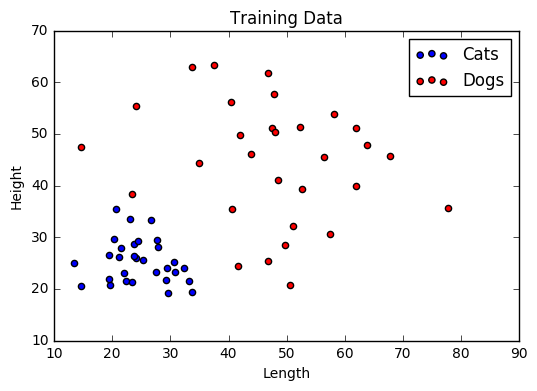

In [3]:
fig, ax = plt.subplots()

ax.scatter(cats[0], cats[1], c='b')
ax.scatter(dogs[0], dogs[1], c='r')

ax.set_title("Training Data")
ax.set_xlabel("Length")
ax.set_ylabel("Height")

ax.legend(("Cats", "Dogs"))

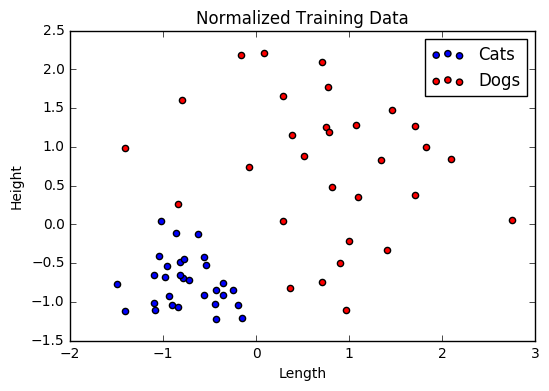

In [4]:
# normalize training data
data = np.concatenate((cats, dogs), axis=1)
cats = ((cats.T - np.mean(data, axis=1)) / np.std(data, axis=1)).T
dogs = ((dogs.T - np.mean(data, axis=1)) / np.std(data, axis=1)).T

fig, ax = plt.subplots()

ax.scatter(cats[0], cats[1], c='b')
ax.scatter(dogs[0], dogs[1], c='r')

ax.set_title("Normalized Training Data")
ax.set_xlabel("Length")
ax.set_ylabel("Height")

ax.legend(("Cats", "Dogs"))

### 3.5 Activation function and target values

In [5]:
# create labels
data = np.concatenate((cats, dogs), axis=1)
labels = np.array([0] * sample_size + [1] * sample_size)

# logistic activation function
def activation(x, derive=False):
    if derive:
        return np.exp(-x) / (1 + np.exp(-x))**2
    return 1 / (1 + np.exp(-x))

### 3.8 Forwardpropagation

In [6]:
# predict output value
def predict(x, weights):
    return activation(np.dot(x.T, weights))

### 3.7 Loss

In [7]:
# sum squared error function
def loss(y_hat, y):
    return np.sum(0.5 * (y_hat - y)**2)

### 3.8 Backpropagation

In [8]:
# calc gradient of the loss
def backprop(x, y, weights):
    y_hat = predict(x, weights)
    el = loss(y_hat, y)
    gradient = np.sum((y_hat - y) * activation(np.dot(x.T, weights), True) * x, axis=1)
    return y_hat, el, gradient

### 3.9 Gradient Descent

In [9]:
epochs = 50
batch_type = "batch"

loss_history = np.zeros(epochs)
weight_history = np.zeros((epochs, 2))

# init weights
weights = np.array([-2.5, -2.5])

# train neural network
for training_step in range(epochs):
    if batch_type == "batch":
        indices = range(sample_size * 2)
        learning_rate = 0.1
    elif batch_type == "stochastic":
        indices = np.random.choice(sample_size * 2, 1, replace=False)
        learning_rate = 2.5
    elif batch_type == "mini-batch":
        batch_size = 10
        indices = np.random.choice(sample_size * 2, batch_size, replace=False)
        learning_rate = 0.5
    
    # create data batch
    batch = data[:, indices]
    batch_labels = labels[indices]

    # backpropagate
    _, loss_history[training_step], gradient = backprop(batch, batch_labels, weights)
    
    # update weights
    weight_history[training_step] = weights
    weights -= learning_rate * gradient

/home/matthias/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/matthias/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


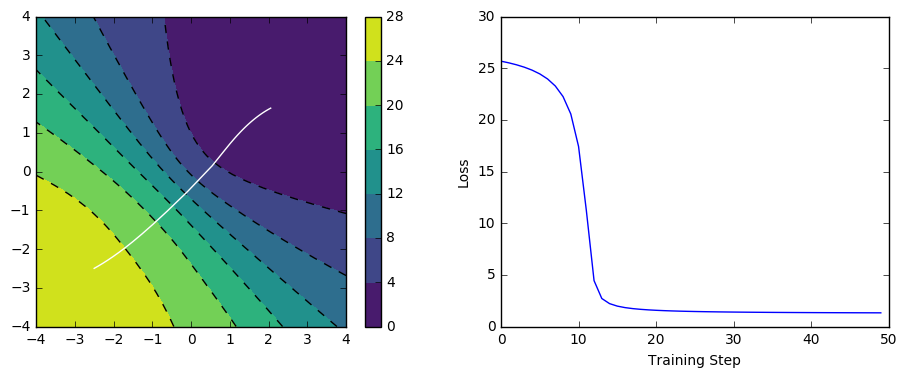

In [10]:
fig = plt.figure(figsize=(11, 4))

# plot error surface
ax = fig.add_subplot(121)
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = loss(predict(data, np.array([X[i,j], Y[i,j]])), labels)

cp = ax.contourf(X, Y, Z, cmap='viridis')
ax.contour(X, Y, Z, colors='black', linestyles='dashed')
ax.plot(weight_history[:,0], weight_history[:,1], 'w')
fig.colorbar(cp)

# plot square loss
ax = fig.add_subplot(122)
ax.plot(range(epochs), loss_history)
ax.set_xlabel("Training Step")
ax.set_ylabel("Loss")

plt.show()

## 5. Momentum

In [11]:
epochs = 50
batch_type = "batch"
momentum = 0.2
last_gradient = np.zeros(2)

loss_history = np.zeros(epochs)
weight_history = np.zeros((epochs, 2))

# init weights
weights = np.array([-2.5, -2.5])

# train neural network
for training_step in range(epochs):
    if batch_type == "batch":
        indices = range(sample_size * 2)
        learning_rate = 0.1
    elif batch_type == "stochastic":
        indices = np.random.choice(sample_size * 2, 1, replace=False)
        learning_rate = 2.5
    elif batch_type == "mini-batch":
        batch_size = 10
        indices = np.random.choice(sample_size * 2, batch_size, replace=False)
        learning_rate = 0.5
    
    # create data batch
    batch = data[:, indices]
    batch_labels = labels[indices]

    # backpropagate
    _, loss_history[training_step], gradient = backprop(batch, batch_labels, weights)
    
    # update weights
    weight_history[training_step] = weights
    weights -= momentum * last_gradient + learning_rate * gradient
    last_gradient = gradient